In [1]:
from plot_lines import *

In [2]:
con = db['con']
# import the data distance, time data
sql = "SELECT id_orig, time_stamp, distance FROM {} WHERE service = %s".format(context['nearest_db_name'])
dist = pd.read_sql(sql, con, params = (service,))
# import population data
sql = 'SELECT "H7X001", geoid10 FROM demograph;'
pop = pd.read_sql(sql, con)
pop = pop.set_index('geoid10')
# merge population into blocks
distxdem = pop.merge(dist, left_on = 'geoid10', right_on = 'id_orig')
distxdem = distxdem.set_index('id_orig')
distxdem.distance = distxdem.distance/1000

In [3]:
ids = np.unique(distxdem[distxdem.H7X001>0].index)

In [4]:
# from datetime import strptime

AttributeError: module 'datetime' has no attribute 'strptime'

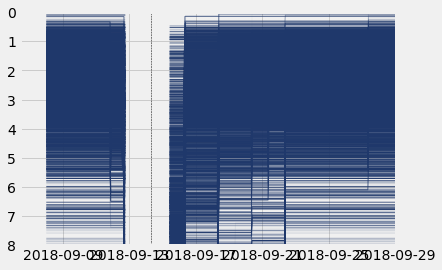

In [8]:
# fig, ax = plt.subplots()
for id_b in ids:
    dist_id = distxdem.loc[id_b]
    population = int(pop.loc[id_b].values)
    plt.plot(dist_id.time_stamp, dist_id.distance, alpha=0.01*population, color='#1F386B',linewidth=1)
# plotting properties
plt.ylim([0,8])
plt.gca().invert_yaxis()

# land fall
if state == 'fl':
    plt.axvline(datetime(2018,10,10,12,0),ls='--', color = 'k')
    # plt.text(datetime(2018,10,10,20,0), 500,'landfall')
    plt.xlim([None, datetime(2018,11,9,12,0)])
else:
    plt.axvline(datetime.datetime(2018,9,14,7,0),ls='--', color = 'k', linewidth=0.5)
    # plt.text(datetime(2018,9,11,0,0), 3.5,'Hurricane Florence \n landfall', fontsize=5)
    plt.xlim([None, datetime.datetime(2018,9,29,0,0)])
#     x_len = dist_id.index[dist_id.time_stamp == datetime(2018,9,29,0,0)].tolist()[0]
# x_len = len(dist_id)

# x ticks
# x_dummy = np.linspace(0,x_len,4)
# code.interact(local=locals())
x_locs = [datetime.strptime(i,"%d-%b-%Y") for i in ['08-Sep-2018','15-Sep-2018','22-Sep-2018','29-Sep-2018']]
x_labels = ['08-Sep','15-Sep','22-Sep','29-Sep']
# x_labels = [dist_id.time_stamp[int(i)].date().strftime("%d-%b") for i in x_dummy]
plt.xticks(ticks=x_locs, labels=x_labels, rotation=0)

In [ ]:
t_dummy

In [ ]:
x_locs = ['08-Sep-2018','15-Sep-2018','22-Sep-2018','29-Sep-2018']

In [ ]:
x_len